#### Importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.layers import layers_creation
from utils.mps import mps_creation
from utils.simulation import filtration_sim

In [ ]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [3]:
mps = 1000
camadas = 6

#### Simulation

In [4]:
filtro = layers_creation(tamanho_rede=1000,porosidade=0.5,
                         camadas=6,limite_tamanho_poro=100,CBM=True,
                         concentracao_cbm=0.01,tamanho_cbm=2,display=False)

mps_dic = mps_creation(qnt_mps = mps,
                       tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=100,display=False)

In [5]:
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos}')
print(f'Eficiência: {100*(round(mps_retidos/mps,2))}%')

Qtd total MPs 1000, qtd MPs retidos 909
Eficiência: 91.0%


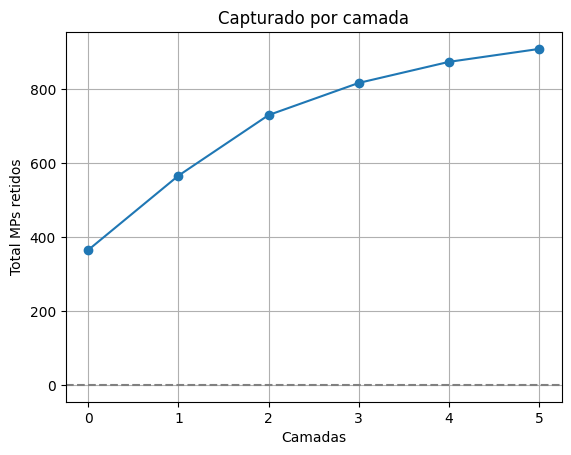

In [6]:
plt.plot(range(camadas),retencao_camada,'-o')

plt.title('Capturado por camada')
plt.xlabel('Camadas')
plt.ylabel('Total MPs retidos')

plt.axhline(y=0,color='gray',linestyle='--')

plt.grid()
plt.show()

#### CBM

In [9]:
filtro_c_cbm = layers_creation(tamanho_rede=1000,porosidade=0.3,
                         camadas=6,limite_tamanho_poro=100,CBM=True,
                         concentracao_cbm=0.3,tamanho_cbm=2,display=False)

mps_dic_c_cbm = mps_creation(qnt_mps = mps,
                       tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos_c_cbm,retencao_camada_c_cbm = filtration_sim(filtro_c_cbm,mps_dic_c_cbm,tamanho_rede=100,display=False)

In [10]:
filtro_s_cbm = layers_creation(tamanho_rede=1000,porosidade=0.3,
                               camadas=6,limite_tamanho_poro=100,CBM=False,
                               concentracao_cbm=0.1,tamanho_cbm=2,display=False)

mps_dic_s_cbm = mps_creation(qnt_mps = mps,
                             tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos_s_cbm,retencao_camada_s_cbm = filtration_sim(filtro_s_cbm,mps_dic_s_cbm,tamanho_rede=100,display=False)

In [11]:
print('Com CBM')
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos_c_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_c_cbm/mps,2))}%')

print('Sem CBM')
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos_s_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_s_cbm/mps,2))}%')

Com CBM
Qtd total MPs 1000, qtd MPs retidos 995
Eficiência: 99.0%
Sem CBM
Qtd total MPs 1000, qtd MPs retidos 917
Eficiência: 92.0%


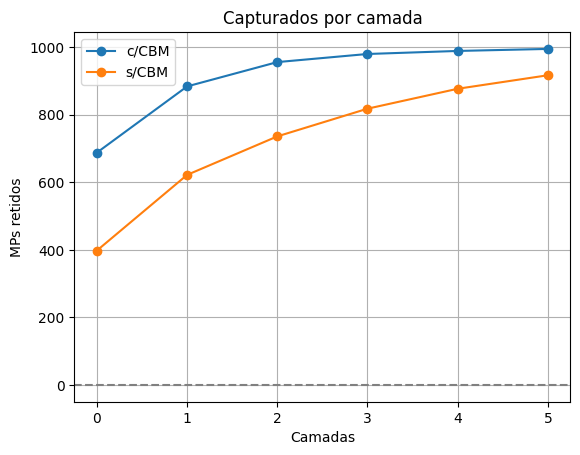

In [12]:
plt.plot(range(camadas),retencao_camada_c_cbm,'-o',label='c/CBM')
plt.plot(range(camadas),retencao_camada_s_cbm,'-o',label='s/CBM')

plt.title('Capturados por camada')
plt.xlabel('Camadas')
plt.ylabel('MPs retidos')

plt.axhline(y=0,color='gray',linestyle='--')

plt.legend()
plt.grid()
plt.show()

#### Porosidade

Porosidade: 0.1
Qtd total MPs 1000, qtd MPs retidos 994
Eficiência: 99.0%
Porosidade: 0.3
Qtd total MPs 1000, qtd MPs retidos 841
Eficiência: 84.0%
Porosidade: 0.5
Qtd total MPs 1000, qtd MPs retidos 604
Eficiência: 60.0%
Porosidade: 0.7
Qtd total MPs 1000, qtd MPs retidos 397
Eficiência: 40.0%
Porosidade: 0.9
Qtd total MPs 1000, qtd MPs retidos 293
Eficiência: 28.999999999999996%


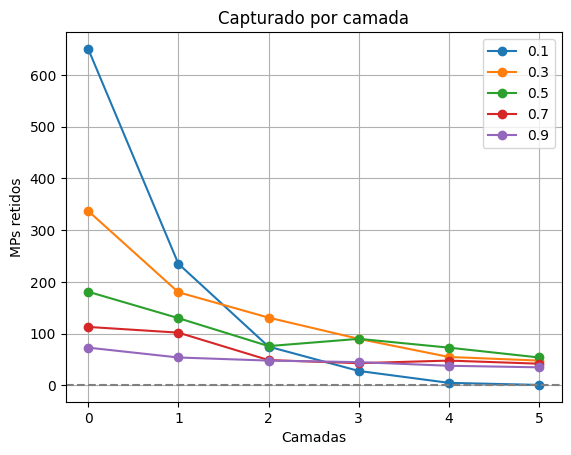

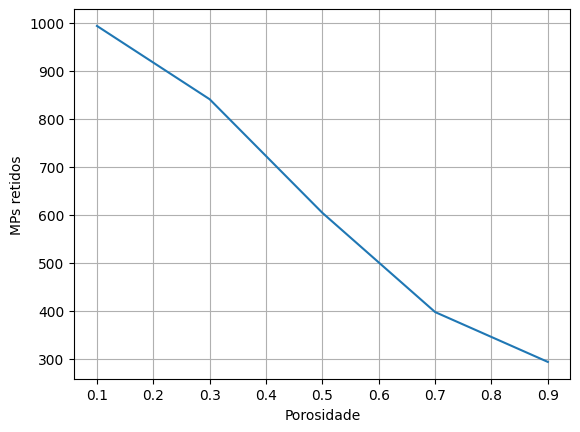

In [11]:
retencao_porosidade = []
porosidades = [0.1,0.3,0.5,0.7,0.9]

for por in porosidades:

    filtro = layers_creation(tamanho_rede=1000,porosidade=por,
                            camadas=6,limite_tamanho_poro=100,CBM=True,
                            concentracao_cbm=0.9,tamanho_cbm=4,display=False)

    mps_dic = mps_creation(qnt_mps = mps,
                        tamanho_limite_mp = 100,tamanho_rede=1000)

    mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=100,display=False)

    print(f'Porosidade: {por}')
    print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos}')
    print(f'Eficiência: {100*(round(mps_retidos/mps,2))}%')

    plt.plot(range(camadas),retencao_camada,'-o',label=por)

    retencao_porosidade.append(mps_retidos)

plt.title('Capturado por camada'),plt.xlabel('Camadas'),plt.ylabel('MPs retidos')
plt.axhline(y=0,color='gray',linestyle='--')
plt.legend(),plt.grid()
plt.show()

plt.plot(porosidades,retencao_porosidade)
plt.xlabel('Porosidade'),plt.ylabel('MPs retidos'),plt.grid()
plt.show()